In [1]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
print("Seaborn imported successfully!")

Seaborn imported successfully!


In [3]:
# Importing required libraries
import pandas as pd

# Load the dataset
file_path =  r"C:\Users\Tonia\Downloads\diabetes_prediction_dataset.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset

print("First few rows of the dataset:")
print(data.head())

# Check the structure of the dataset
print("\nDataset Information:")
data.info()

First few rows of the dataset:
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender          

In [5]:
# Convert columns to numeric and drop rows with missing values
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values
cleaned_data = data.dropna(subset=numeric_columns)

# Verify the cleaned data
print(cleaned_data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


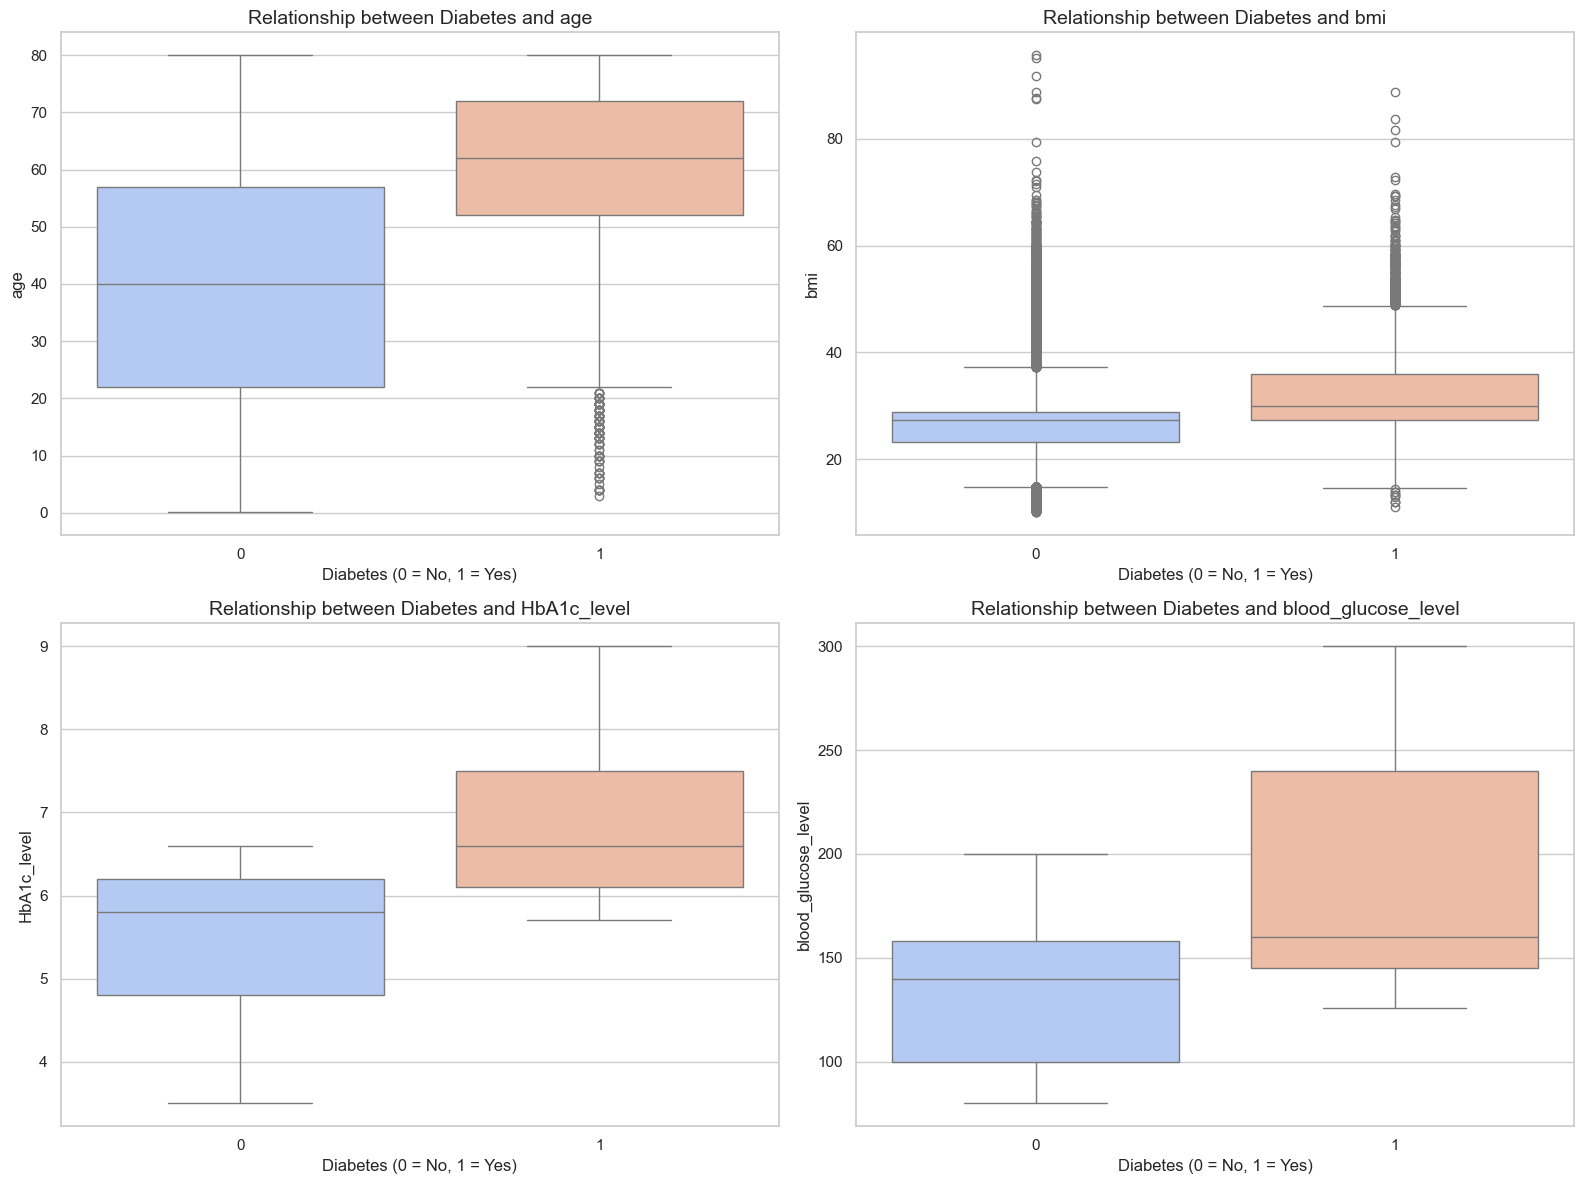

In [7]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visual style
sns.set(style="whitegrid")

# Key features to analyze
key_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Create a grid of boxplots to visualize relationships
plt.figure(figsize=(16, 12))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diabetes', y=feature, data=cleaned_data, hue='diabetes', palette="coolwarm", dodge=False)
    plt.title(f'Relationship between Diabetes and {feature}', fontsize=14)
    plt.xlabel('Diabetes (0 = No, 1 = Yes)', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.legend([], [], frameon=False)  # Hide redundant legend

plt.tight_layout()
plt.show()

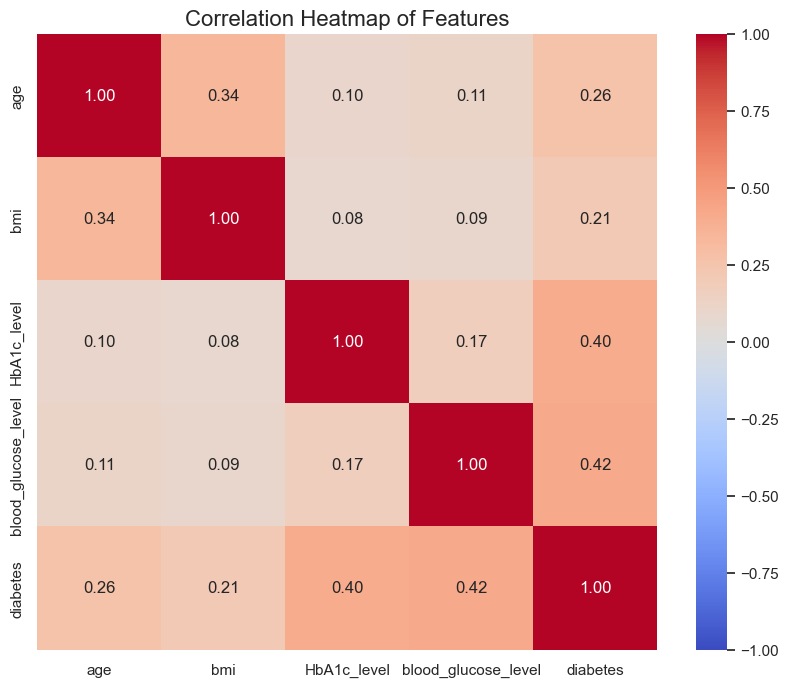

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
correlation_matrix = cleaned_data[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

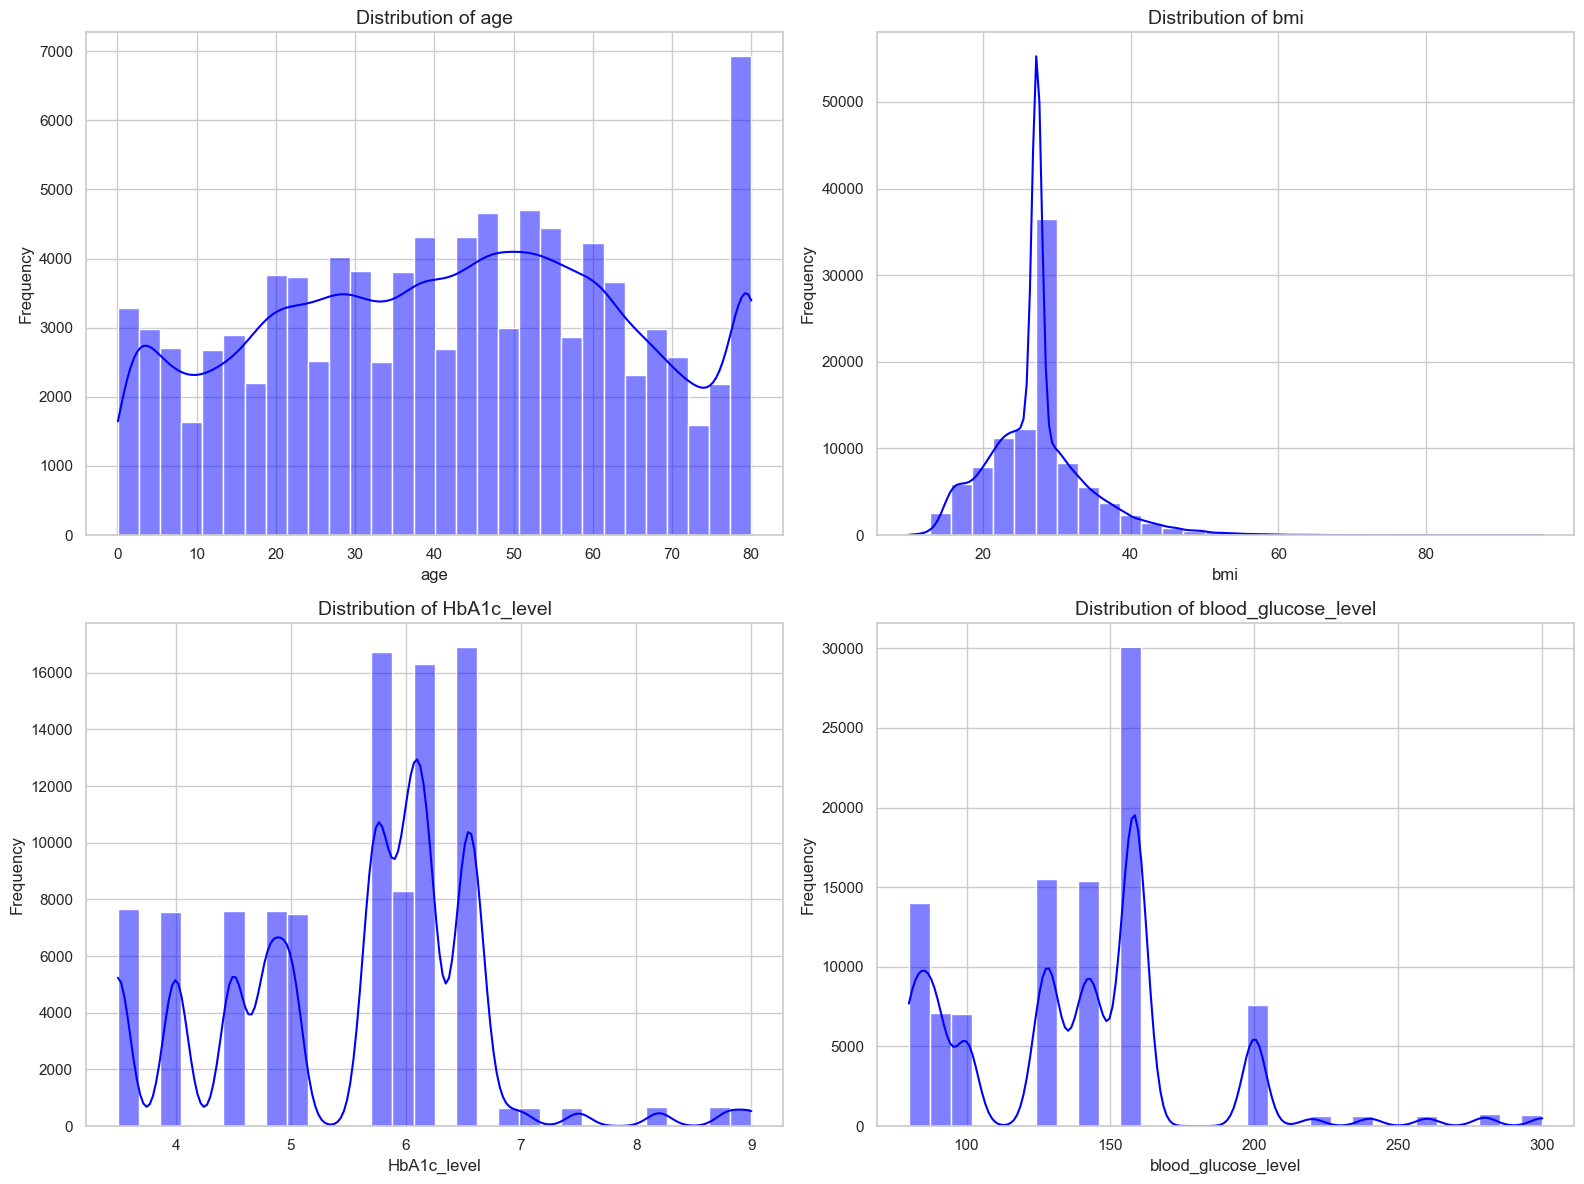

In [9]:
# Univariate distribution of key features
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features[:-1], 1):  # Exclude 'diabetes' as it's a target
    plt.subplot(2, 2, i)
    sns.histplot(cleaned_data[feature], kde=True, bins=30, color="blue")
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

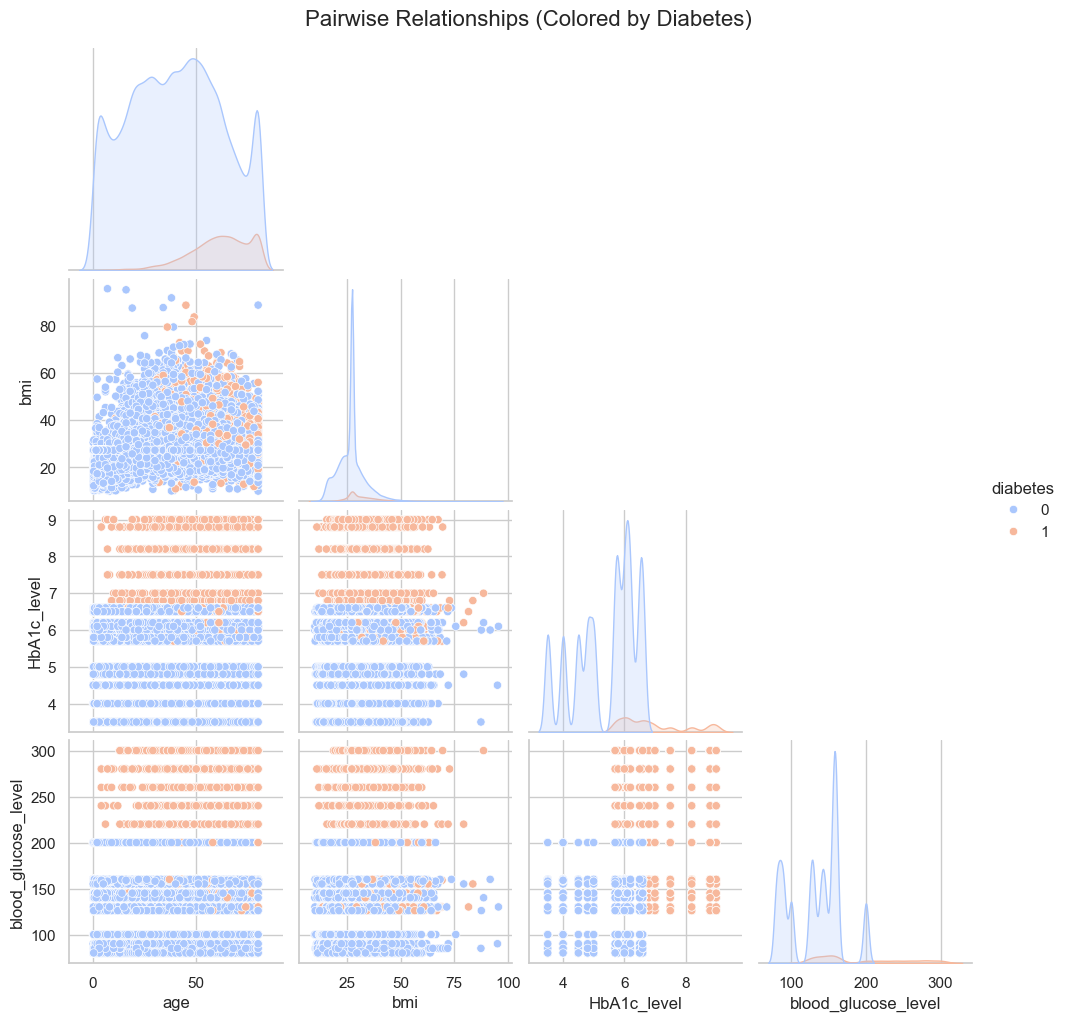

In [10]:
# Pairwise scatter plots with diabetes status
sns.pairplot(cleaned_data[numeric_features], hue='diabetes', palette="coolwarm", diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships (Colored by Diabetes)', y=1.02, fontsize=16)
plt.show()

In [12]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------- ----------------------------- 2.9/11.1 MB 16.7 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 19.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.6.0


In [5]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Tonia\Downloads\diabetes_prediction_dataset.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Check the first few rows of the dataset
print(data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [7]:
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values
cleaned_data = data.dropna(subset=numeric_columns)

# Verify cleaned data
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


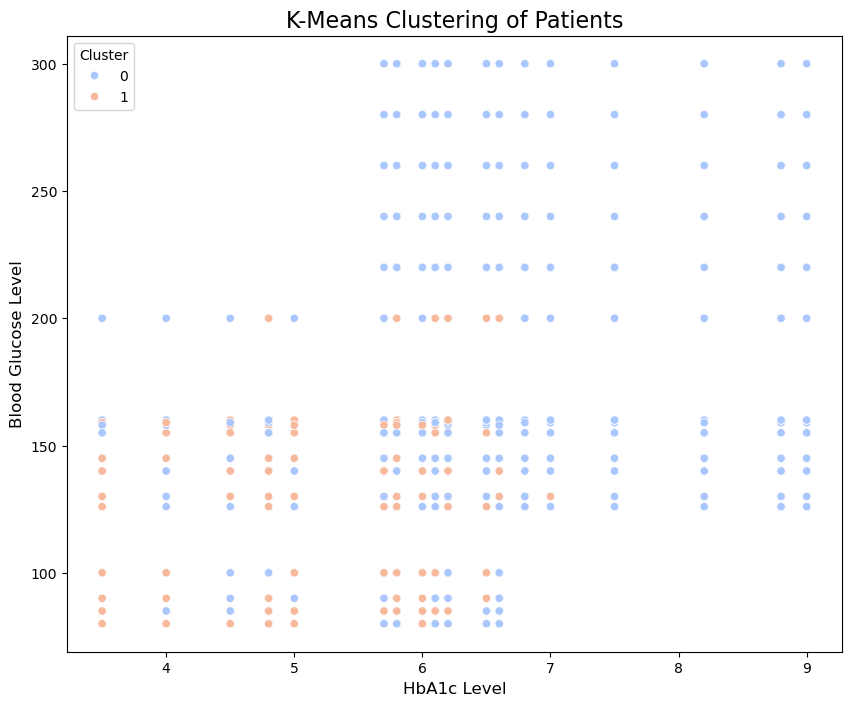

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', hue='cluster', data=cleaned_data, palette="coolwarm")
plt.title('K-Means Clustering of Patients', fontsize=16)
plt.xlabel('HbA1c Level', fontsize=12)
plt.ylabel('Blood Glucose Level', fontsize=12)
plt.legend(title='Cluster', loc='upper left')
plt.show()

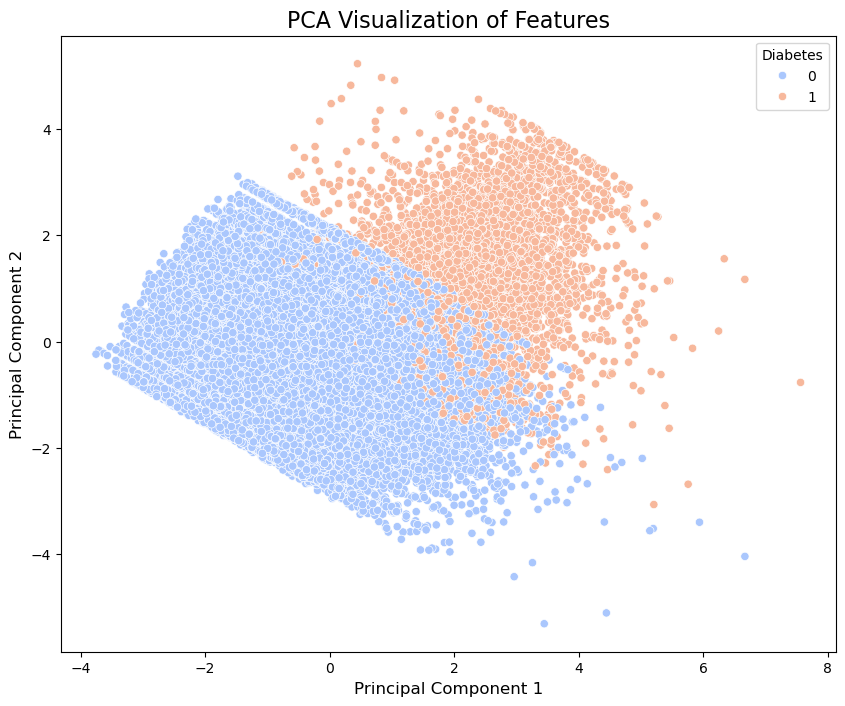

In [13]:
from sklearn.decomposition import PCA

# Apply PCA to the scaled data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['diabetes'] = cleaned_data['diabetes']

# Visualize PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='diabetes', data=pca_df, palette="coolwarm")
plt.title('PCA Visualization of Features', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Diabetes', loc='upper right')
plt.show()

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27453
           1       0.87      0.60      0.71      2547

    accuracy                           0.96     30000
   macro avg       0.92      0.80      0.84     30000
weighted avg       0.96      0.96      0.95     30000



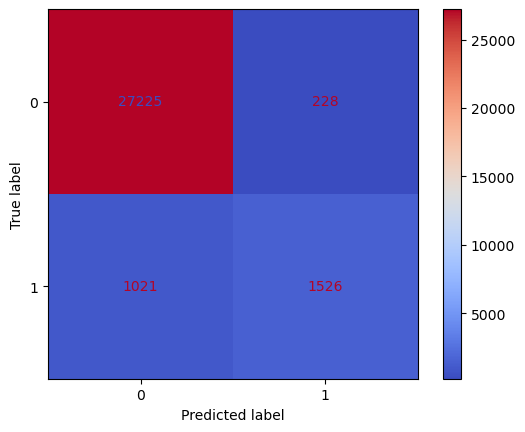

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Prepare the data
X = cleaned_data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = cleaned_data['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="coolwarm")
plt.show()

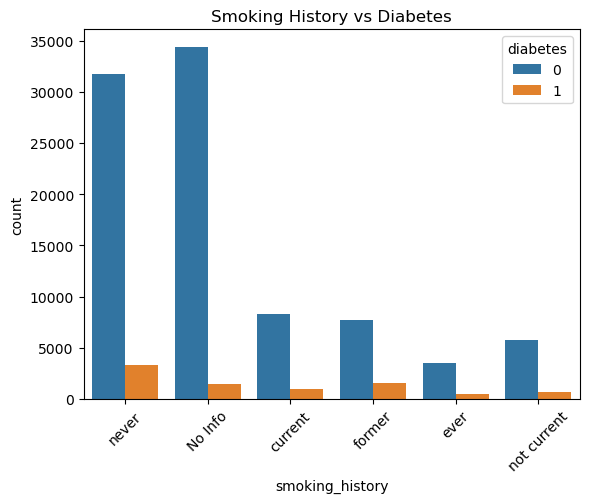

In [15]:
# Smoking History vs Diabetes
sns.countplot(x='smoking_history', hue='diabetes', data=data)
plt.title("Smoking History vs Diabetes")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Example of encoding the 'smoking_history' variable using One-Hot Encoding
data_encoded = pd.get_dummies(cleaned_data, columns=['smoking_history'], drop_first=True)

# Verify the new columns after encoding
print(data_encoded.head())

   gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0  Female  80.0             0              1  25.19          6.6   
1  Female  54.0             0              0  27.32          6.6   
2    Male  28.0             0              0  27.32          5.7   
3  Female  36.0             0              0  23.45          5.0   
4    Male  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  cluster  smoking_history_current  \
0                  140         0        0                    False   
1                   80         0        0                    False   
2                  158         0        1                    False   
3                  155         0        1                     True   
4                  155         0        0                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False                   False                   True   
1                 Fals

In [17]:
# Import required libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Example of encoding the 'smoking_history' variable using One-Hot Encoding
data_encoded = pd.get_dummies(cleaned_data, columns=['smoking_history'], drop_first=True)

# Verify the new columns after encoding
print(data_encoded.head())

   gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0  Female  80.0             0              1  25.19          6.6   
1  Female  54.0             0              0  27.32          6.6   
2    Male  28.0             0              0  27.32          5.7   
3  Female  36.0             0              0  23.45          5.0   
4    Male  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  cluster  smoking_history_current  \
0                  140         0        0                    False   
1                   80         0        0                    False   
2                  158         0        1                    False   
3                  155         0        1                     True   
4                  155         0        0                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False                   False                   True   
1                 Fals

In [18]:
# Age Group Feature
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Elderly'

data_encoded['age_group'] = data_encoded['age'].apply(categorize_age)

# BMI Category Feature
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

data_encoded['bmi_category'] = data_encoded['bmi'].apply(categorize_bmi)

# Combined Risk Score Feature
# Example: Weighted sum of HbA1c level and blood glucose
data_encoded['risk_score'] = (0.5 * data_encoded['HbA1c_level']) + (0.5 * data_encoded['blood_glucose_level'])

# Verify the new features
print(data_encoded[['age_group', 'bmi_category', 'risk_score']].head())

     age_group   bmi_category  risk_score
0      Elderly     Overweight       73.30
1  Middle-aged     Overweight       43.30
2        Young     Overweight       81.85
3  Middle-aged  Normal weight       80.00
4      Elderly  Normal weight       79.90


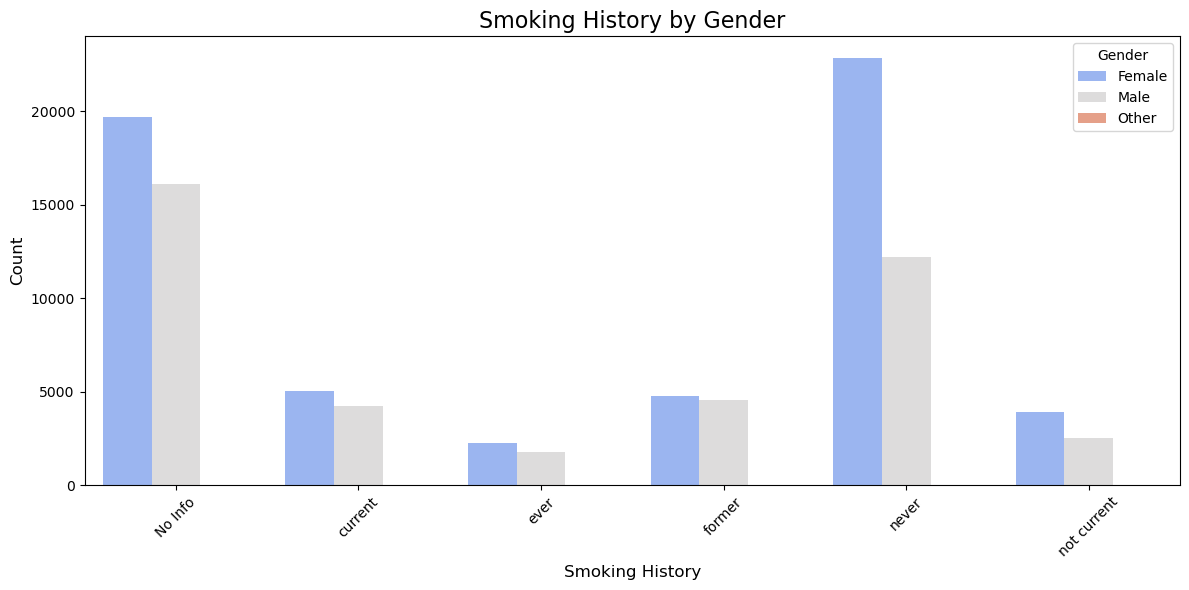

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by gender and smoking history
smoking_gender_data = cleaned_data.groupby(['gender', 'smoking_history']).size().reset_index(name='count')

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=smoking_gender_data, x='smoking_history', y='count', hue='gender', palette='coolwarm')

# Add chart title and labels
plt.title('Smoking History by Gender', fontsize=16)
plt.xlabel('Smoking History', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()

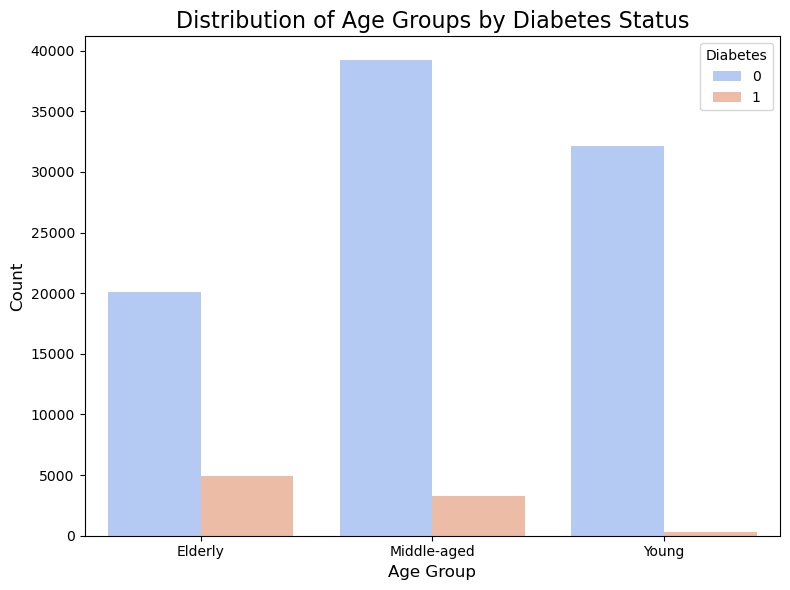

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_encoded, x='age_group', hue='diabetes', palette='coolwarm')

# Add chart title and labels
plt.title('Distribution of Age Groups by Diabetes Status', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Diabetes', loc='upper right')
plt.tight_layout()
plt.show()

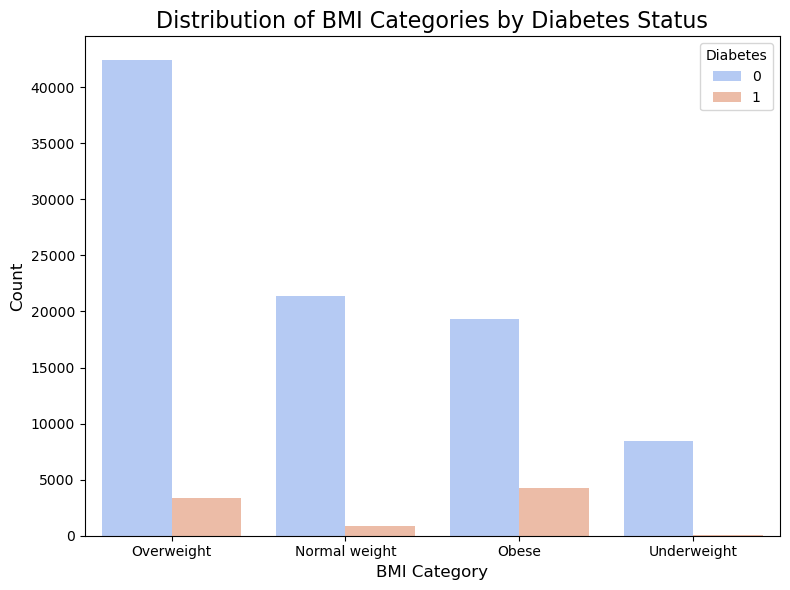

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_encoded, x='bmi_category', hue='diabetes', palette='coolwarm')

# Add chart title and labels
plt.title('Distribution of BMI Categories by Diabetes Status', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Diabetes', loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\Tonia\AppData\Local\Temp\ipykernel_7544\3283926885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_encoded, x='diabetes', y='risk_score', palette='coolwarm')


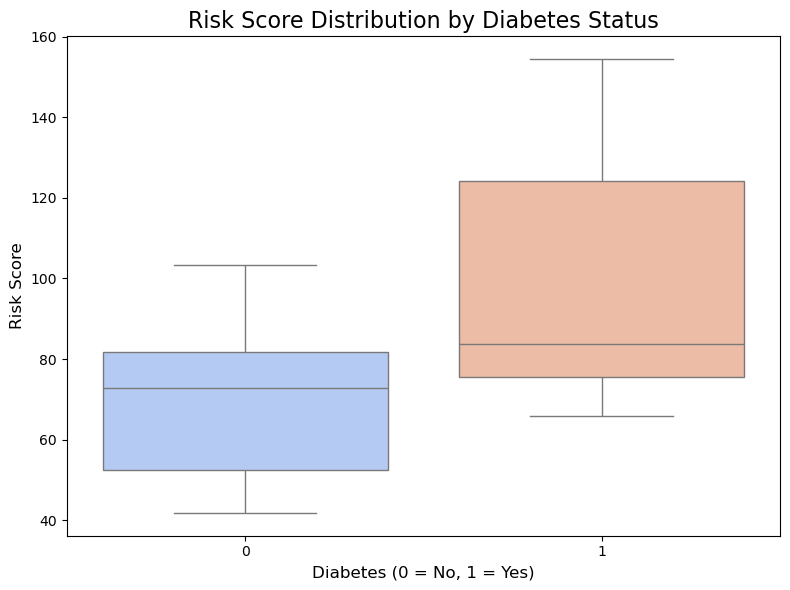

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_encoded, x='diabetes', y='risk_score', palette='coolwarm')

# Add chart title and labels
plt.title('Risk Score Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Diabetes (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Risk Score', fontsize=12)
plt.tight_layout()
plt.show()

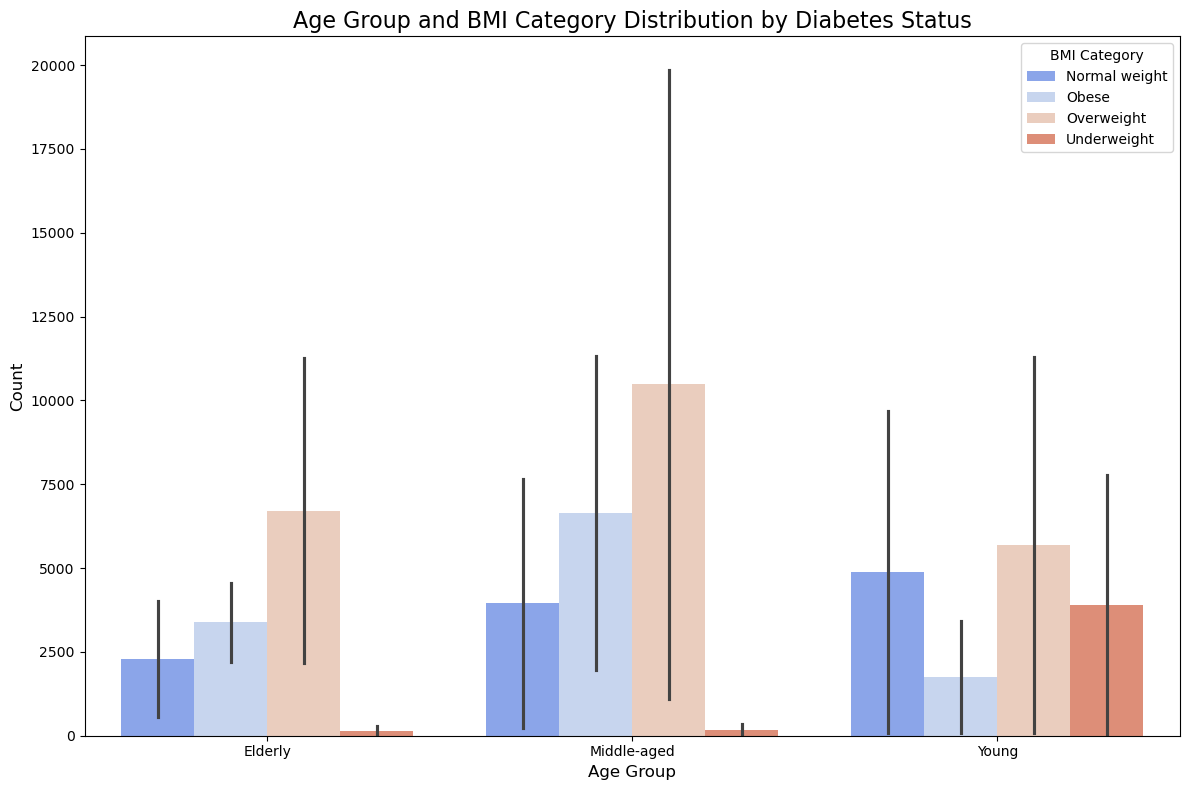

In [24]:
# Group by age group, BMI category, and diabetes status
age_bmi_group = data_encoded.groupby(['age_group', 'bmi_category', 'diabetes']).size().reset_index(name='count')

# Plot grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=age_bmi_group, x='age_group', y='count', hue='bmi_category', palette='coolwarm')

# Add chart title and labels
plt.title('Age Group and BMI Category Distribution by Diabetes Status', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='BMI Category', loc='upper right')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Test the model
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.9671333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     27453
           1       0.90      0.69      0.78      2547

    accuracy                           0.97     30000
   macro avg       0.94      0.84      0.88     30000
weighted avg       0.97      0.97      0.97     30000



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Test the model
y_pred_lr = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.9583666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     27453
           1       0.87      0.60      0.71      2547

    accuracy                           0.96     30000
   macro avg       0.92      0.80      0.84     30000
weighted avg       0.96      0.96      0.95     30000



In [29]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   - -------------------------------------- 6.0/124.9 MB 30.8 MB/s eta 0:00:04
   -- ------------------------------------- 8.4/124.9 MB 27.4 MB/s eta 0:00:05
   ---- ----------------------------------- 13.4/124.9 MB 22.1 MB/s eta 0:00:06
   ----- ---------------------------------- 17.8/124.9 MB 21.6 MB/s eta 0:00:05
   ------- -------------------------------- 22.8/124.9 MB 22.5 MB/s eta 0:00:05
   -------- ------------------------------- 27.3/124.9 MB 22.4 MB/s eta 0:00:05
   --------- ------------------------------ 30.7/124.9 MB 21.4 MB/s eta 0:00:05
   ----------- ---------------------------- 35.1/124.9 MB 21.5 MB/s eta 0:00:05
   ----------- ---------------------------- 35.7/124.9 MB 21.4 MB/s eta 0:00:05
   ------------ --------------------------- 37.7/124.9 MB 19.2 MB/s eta 0:00:05
   ------------ --------------------------- 39.3/124.9 MB 17.5 MB/s eta 0:00:05
   ------------ --------------------------- 39.8/12

In [1]:
import xgboost
print("XGBoost installed successfully!")

XGBoost installed successfully!


In [6]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Tonia\Downloads\diabetes_prediction_dataset.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Verify the dataset
print(data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [7]:
# Convert key columns to numeric types and handle missing values
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values
cleaned_data = data.dropna(subset=numeric_columns)

# Verify the cleaned dataset
print(cleaned_data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [8]:
# Ensure pandas is imported
import pandas as pd

# Perform one-hot encoding on the 'smoking_history' column
data_encoded = pd.get_dummies(cleaned_data, columns=['smoking_history'], drop_first=True)

# Verify the encoded dataset
print(data_encoded.head())

   gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0  Female  80.0             0              1  25.19          6.6   
1  Female  54.0             0              0  27.32          6.6   
2    Male  28.0             0              0  27.32          5.7   
3  Female  36.0             0              0  23.45          5.0   
4    Male  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  smoking_history_current  \
0                  140         0                    False   
1                   80         0                    False   
2                  158         0                    False   
3                  155         0                     True   
4                  155         0                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False                   False                   True   
1                 False                   False                  False   
2 

In [9]:
# Ensure the cleaned dataset exists
print(cleaned_data.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [10]:
# Encoding categorical variables and creating a new dataset
data_encoded = pd.get_dummies(cleaned_data, columns=['smoking_history', 'gender'], drop_first=True)

# Verify the new dataset
print(data_encoded.head())

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  smoking_history_current  smoking_history_ever  \
0         0                    False                 False   
1         0                    False                 False   
2         0                    False                 False   
3         0                     True                 False   
4         0                     True                 False   

   smoking_history_former  smoking_history_never  smoking_history_not current  \
0                   False                   True           

In [11]:
X = data_encoded.drop(['diabetes'], axis=1)  # Features
y = data_encoded['diabetes']  # Target

In [12]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 80000 samples
Testing set size: 20000 samples


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Test the model
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

C:\Users\Tonia\anaconda3\envs\Tonia_easyocr\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:56:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier:
Accuracy: 0.97165
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



## Mchine Learning

In [15]:
X = data.drop(columns=["diabetes"])
y = data['diabetes']

In [16]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [20]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,Male,73.0,0,0,former,24.77,3.5,80
48955,Male,80.0,0,0,never,24.60,5.7,145
44966,Female,38.0,0,0,ever,24.33,4.0,158
13568,Female,26.0,0,0,not current,18.87,5.0,100
92727,Female,61.0,1,0,current,22.11,4.5,85


In [21]:
X.shape

(100000, 8)

In [22]:
X_train.shape, X_test.shape

((80000, 8), (20000, 8))

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [25]:
categorical_col = data.select_dtypes(exclude='number').columns

In [26]:
categorical_col 

Index(['gender', 'smoking_history'], dtype='object')

In [27]:
X_train_encoded = encoder.fit_transform(X_train[categorical_col])

In [28]:
X_train_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [29]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,Male,73.0,0,0,former,24.77,3.5,80
48955,Male,80.0,0,0,never,24.60,5.7,145
44966,Female,38.0,0,0,ever,24.33,4.0,158
13568,Female,26.0,0,0,not current,18.87,5.0,100
92727,Female,61.0,1,0,current,22.11,4.5,85


In [30]:
encoder.get_feature_names_out(categorical_col)

array(['gender_Female', 'gender_Male', 'gender_Other',
       'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype=object)

In [31]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_col))

In [32]:
X_train_encoded_df.head()

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,Male,73.0,0,0,former,24.77,3.5,80
48955,Male,80.0,0,0,never,24.60,5.7,145
44966,Female,38.0,0,0,ever,24.33,4.0,158
13568,Female,26.0,0,0,not current,18.87,5.0,100
92727,Female,61.0,1,0,current,22.11,4.5,85


In [34]:
X_test_encoded = encoder.transform(X_test[categorical_col])

In [35]:
X_test_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [36]:
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_col))

In [37]:
X_train_encoded_df.reset_index(drop=True, inplace=True)
X_test_encoded_df.reset_index(drop=True, inplace=True)

In [38]:
X_train_encoded_df.head()

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
X_train_rem = X_train.drop(columns=categorical_col).reset_index(drop=True)
X_test_rem = X_test.drop(columns=categorical_col).reset_index(drop=True)

In [40]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
75220,Male,73.0,0,0,former,24.77,3.5,80
48955,Male,80.0,0,0,never,24.60,5.7,145
44966,Female,38.0,0,0,ever,24.33,4.0,158
13568,Female,26.0,0,0,not current,18.87,5.0,100
92727,Female,61.0,1,0,current,22.11,4.5,85


In [41]:
X_test_rem

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,13.0,0,0,20.82,5.8,126
1,3.0,0,0,21.00,5.0,145
2,63.0,0,0,25.32,3.5,200
3,2.0,0,0,17.43,6.1,126
4,33.0,0,0,40.08,6.2,200
...,...,...,...,...,...,...
19995,44.0,0,0,21.95,6.0,159
19996,61.0,1,0,41.98,3.5,90
19997,49.0,0,0,26.51,4.8,100
19998,73.0,0,1,27.32,6.6,100


In [42]:
X_train_final = pd.concat([X_train_rem, X_train_encoded_df], axis=1)
X_test_final= pd.concat([X_test_rem, X_test_encoded_df], axis=1)

In [43]:
X_train_final.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,73.0,0,0,24.77,3.5,80,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,80.0,0,0,24.60,5.7,145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38.0,0,0,24.33,4.0,158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,26.0,0,0,18.87,5.0,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,61.0,1,0,22.11,4.5,85,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [44]:
X_test_final

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,13.0,0,0,20.82,5.8,126,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0,0,21.00,5.0,145,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,63.0,0,0,25.32,3.5,200,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,0,0,17.43,6.1,126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,33.0,0,0,40.08,6.2,200,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44.0,0,0,21.95,6.0,159,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19996,61.0,1,0,41.98,3.5,90,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19997,49.0,0,0,26.51,4.8,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19998,73.0,0,1,27.32,6.6,100,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

In [47]:
X_test_scaled

array([[-1.28824683, -0.28630923, -0.20355869, ..., -0.32187031,
        -0.73511021, -0.26293117],
       [-1.73274126, -0.28630923, -0.20355869, ..., -0.32187031,
        -0.73511021, -0.26293117],
       [ 0.93422533, -0.28630923, -0.20355869, ...,  3.10684138,
        -0.73511021, -0.26293117],
       ...,
       [ 0.31193312, -0.28630923, -0.20355869, ..., -0.32187031,
         1.36034024, -0.26293117],
       [ 1.37871976, -0.28630923,  4.9125881 , ..., -0.32187031,
        -0.73511021, -0.26293117],
       [ 0.04523647, -0.28630923, -0.20355869, ..., -0.32187031,
         1.36034024, -0.26293117]])

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_model = LogisticRegression(random_state=42, max_iter=1000)

In [50]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [51]:
y_pred_log = log_model.predict(X_test_scaled)

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
accuracy_log = accuracy_score(y_test, y_pred_log)

In [54]:
print(round(accuracy_log,2))

0.96


In [55]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_model = RandomForestClassifier(random_state=42)

In [58]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [59]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [60]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [61]:
print(round(accuracy_rf,2))

0.97


In [62]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
rf_model = GradientBoostingClassifier(random_state=42)

In [66]:
rf_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [68]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [69]:
print(round(accuracy_rf,2))

0.97


In [70]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



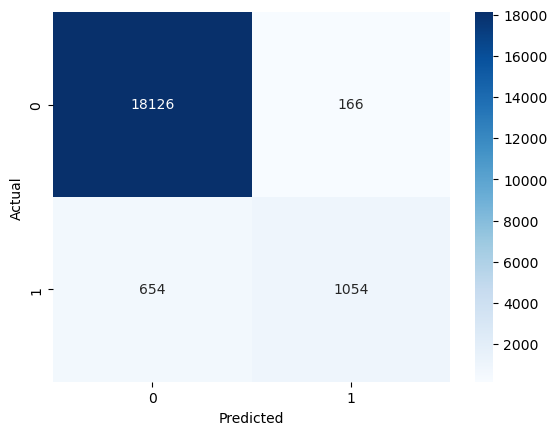

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_log, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual');